In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV
from  sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from scipy.stats import randint

# Read Data

In [24]:
training_data = pd.read_csv('cleanedTrainingData.csv')
training_labels = pd.read_csv('trainingsetlabels.csv')
test_data = pd.read_csv('cleanedTestData.csv')

# Preparation

In [25]:
# training_data.date_recorded = pd.to_datetime(training_data.date_recorded).dt.strftime("%Y%m%d")
# test_data.date_recorded = pd.to_datetime(test_data.date_recorded).dt.strftime("%Y%m%d")
training_data = training_data.drop('id', axis=1)
stringCols = training_data.select_dtypes(object)
testStrings = test_data.select_dtypes(object)

In [26]:
our_features =  [
   'longitude', 
   'latitude', 
   'region', 
   'region_code', 
   'district_code', 
   'lga', 
   'extraction_type', 
   'extraction_type_group', 
   'extraction_type_class', 
   'payment', 
   'payment_type', 
   'quantity', 
   'quantity_group', 
   'source_type', 
   'waterpoint_type', 
   'waterpoint_type_group', 
   'amount_tsh', 
   'source', 
   'source_class', 
   'gps_height', 
   'construction_year', 
   'date_recorded', 
   'subvillage', 
   'wpt_name', 
   'num_private', 
   'recorded_by', 
   'permit', 
   'management_group', 
   'quality_group', 
   'funder', 
   'installer', 
   'ward', 
   'population', 
   'scheme_name'
   ]

In [28]:
for feature in stringCols:
   training_data[feature] = training_data[feature].str.upper()
   test_data[feature] = test_data[feature].str.upper()

## Drop extra features from training set

In [29]:
training_data= training_data[our_features]

## Drop extra features from test set

In [30]:
test_data=test_data[our_features]

In [ ]:
# scale.transform(df)

In [31]:
len(training_data.columns)

34

In [22]:
type(training_data.lga.values)

numpy.ndarray

In [34]:
train_len = len(training_data)
test_len = len (test_data)
le = LabelEncoder()
df = pd.concat([training_data,test_data])
scale = StandardScaler()
for feature in our_features:
   df[feature] = le.fit_transform(df[feature]).astype('str')
   df[feature] = scale.fit_transform(df[feature].array.reshape(-1,1))

## Check lengths for accuracy
encoded_train = df[:train_len]
encoded_test = df[train_len:]
print(train_len, len(encoded_train))
print(test_len, len(encoded_test))

59400 59400
14850 14850


## Convert Training features to appropriate types

In [ ]:
# training_data['public_meeting']=training_data['public_meeting'].astype('boolean')
# training_data['permit']=training_data['permit'].astype('boolean')
# training_data['region_code']=training_data['region_code'].astype(object)
# training_data['funder']=training_data['funder'].astype(object)
# training_data['installer']=training_data['installer'].astype(object)
# training_data['basin']=training_data['basin'].astype(object)
# training_data['subvillage']=training_data['subvillage'].astype(object)
# training_data['lga']=training_data['lga'].astype(object)
# training_data['ward']=training_data['ward'].astype(object)
# training_data['scheme_management']=training_data['scheme_management'].astype(object)
# training_data['extraction_type']=training_data['extraction_type'].astype(object)
# training_data['management']=training_data['management'].astype(object)
# training_data['management_group']=training_data['management_group'].astype(object)
# # training_data['payment']=training_data['payment'].astype(object)
# training_data['payment_type']=training_data['payment_type'].astype(object)
# training_data['water_quality']=training_data['water_quality'].astype(object)
# training_data['quantity']=training_data['quantity'].astype(object)
# training_data['source']=training_data['source'].astype('category')
# training_data['waterpoint_type']=training_data['waterpoint_type'].astype(object)
# # training_data['wpt_name']=training_data['wpt_name'].astype(object)

## Convert Testing features to appropriate types

In [ ]:
# test_data['public_meeting']=test_data['public_meeting'].astype('boolean')
# test_data['permit']=test_data['permit'].astype('boolean')
# test_data['region_code']=test_data['region_code'].astype('category')
# test_data['funder']=test_data['funder'].astype('category')
# test_data['installer']=test_data['installer'].astype('category')
# test_data['basin']=test_data['basin'].astype('category')
# test_data['subvillage']=test_data['subvillage'].astype('category')
# test_data['lga']=test_data['lga'].astype('category')
# test_data['ward']=test_data['ward'].astype('category')
# test_data['scheme_management']=test_data['scheme_management'].astype('category')
# test_data['extraction_type']=test_data['extraction_type'].astype('category')
# test_data['management']=test_data['management'].astype('category')
# test_data['management_group']=test_data['management_group'].astype('category')
# # test_data['payment']=test_data['payment'].astype('category')
# test_data['payment_type']=test_data['payment_type'].astype('category')
# test_data['water_quality']=test_data['water_quality'].astype('category')
# test_data['quantity']=test_data['quantity'].astype('category')
# test_data['source']=test_data['source'].astype('category')
# test_data['waterpoint_type']=test_data['waterpoint_type'].astype('category')
# # test_data['wpt_name']=test_data['wpt_name'].astype('category')

In [ ]:
# dummied_training = pd.get_dummies(training_data, drop_first=True)

# training_data['public_meeting']=OneHotEncoder(training_data['public_meeting'])
# training_data['permit']=pd.OneHotEncoder(training_data['permit'])
# training_data['region_code']=pd.OneHotEncoder(training_data['region_code'])
# training_data['funder']=pd.get_dummies(training_data['funder'], drop_first=True)
# training_data['installer']=pd.get_dummies(training_data['installer'], drop_first=True)
# training_data['basin']=pd.get_dummies(training_data['basin'], drop_first=True)
# training_data['subvillage']=pd.get_dummies(training_data['subvillage'], drop_first=True)
# training_data['lga']=pd.get_dummies(training_data['lga'], drop_first=True)
# training_data['ward']=pd.get_dummies(training_data['ward'], drop_first=True)
# training_data['scheme_management']=pd.get_dummies(training_data['scheme_management'], drop_first=True)
# training_data['extraction_type']=pd.get_dummies(training_data['extraction_type'], drop_first=True)
# training_data['management']=pd.get_dummies(training_data['management'], drop_first=True)
# training_data['management_group']=pd.get_dummies(training_data['management_group'], drop_first=True)
# training_data['payment']=pd.get_dummies(training_data['payment'], drop_first=True)
# training_data['payment_type']=pd.get_dummies(training_data['payment_type'], drop_first=True)
# training_data['water_quality']=pd.get_dummies(training_data['water_quality'], drop_first=True)
# training_data['quantity']=pd.get_dummies(training_data['quantity'], drop_first=True)
# training_data['source']=pd.get_dummies(training_data['source'], drop_first=True)
# training_data['waterpoint_type']=pd.get_dummies(training_data['waterpoint_type'], drop_first=True)
# training_data['wpt_name']=pd.get_dummies(training_data['wpt_name'], drop_first=True)

Approximately half of the values in 'funder' and 'installer' have only 1 entry
* Maybe create new feature for each to reduce both to 2 sets per ([funder > 1: Bool], [installer > 1: Bool])

In [ ]:
# import seaborn as sns
# sns.set_style('whitegrid')
# sns.countplot(x='funder_group', data=training_data)
(training_data.funder.value_counts()>1).value_counts(normalize=True)
# (training_data.installer.value_counts()>1).value_counts(normalize=True)

False    0.513713
True     0.486287
Name: funder, dtype: float64

In [ ]:
training_data.groupby('funder').filter(lambda x: len(x) >0 and len(x) < 50000).funder.value_counts(normalize=True)
# training_data.funder.value_counts()

GOVERNMENT OF TANZANIA    0.152929
ROMAN                     0.078906
DANIDA                    0.052424
HESAWA                    0.037071
RWSSP                     0.023131
                            ...   
LOTTERY                   0.000017
RARYMOND EKURA            0.000017
JUSTINE MARWA             0.000017
MUNICIPAL COUNCIL         0.000017
SAMLO                     0.000017
Name: funder, Length: 1896, dtype: float64

In [ ]:
# training_data.corr()
# dummied_training.corr()

In [ ]:
# training_data.dtypes

In [ ]:
# stringCols = training_data.select_dtypes(object)
# testStrings = test_data.select_dtypes('category')
# stringCols.columns

# Encoding
## Create list of columns

In [ ]:
# features = training_data.columns
training_data.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin',
       'subvillage', 'population', 'public_meeting', 'scheme_management',
       'permit', 'extraction_type', 'management', 'management_group',
       'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'age'],
      dtype='object')

## Create OneHotEncoder

In [ ]:
# mergedata = training_data.append(test_data.drop('id',axis=1))
# testcount = len(test_data)
# count = len(mergedata)-testcount
# X_cat = mergedata.copy()
# X_cat = mergedata.select_dtypes(include=['category'])
# X_enc = X_cat.copy()

# X_enc = pd.get_dummies(X_enc, columns=X_cat.columns, drop_first=True)
# # mergedata = mergedata.drop(stringCols.columns, axis=1)
# FinalData = pd.concat([mergedata, X_enc], axis=1)
# encoded_train = FinalData[:count]
# encoded_test = FinalData[count:]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(encoded_train, training_labels, test_size=0.2, random_state=42)
y_train_id = y_train.copy()
y_test_id = y_test.copy()
y_train = y_train.drop('id',axis=1)
y_test = y_test.drop('id',axis=1)

## check if length and created columns are correct

In [ ]:
# X_train['payment']

### MEMORY ERRORS
* After creating dummy features, the amount of columns in the dataframe increases from 40 to ~77,000
* One way to handle this may be to split the data into multiple smaller sets maybe 1,000-2,000 per
* One idea would be to decide the most important features to keep based on the smaller sets

In [ ]:
# X_train.iloc[:1000,:]

In [36]:
clf = RandomForestClassifier(random_state=42)
param_dist = {
   "n_estimators": [300, 400, 500, 600, 700, 800],
   "max_depth": [2, 3, 4, 5],
   "n_jobs": [-1],
   "max_features": [5, 10, 15, 19],
   "min_samples_split": [2, 3, 5, 8],
   "bootstrap": [True, False],
   "criterion": ["gini", "entropy"],}
gsh = GridSearchCV(clf, param_dist)

In [37]:
# clf = RandomForestClassifier(criterion='entropy', max_features=10, n_estimators=400,
#                        n_jobs=-1, oob_score=True, random_state=42,
#                        warm_start=True)
gsh.fit(X_train,y_train)

E:\Users\Zac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Users\Zac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Users\Zac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\Users\Zac\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [5, 10, 15, 19],
                         'min_samples_split': [2, 3, 5, 8],
                         'n_estimators': [300, 400, 500, 600, 700, 800],
                         'n_jobs': [-1]})

In [40]:
best_clf = gsh.best_estimator_
gsh.best_score_
gsh.feature_names_in_

array(['longitude', 'latitude', 'region', 'region_code', 'district_code',
       'lga', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'payment', 'payment_type', 'quantity',
       'quantity_group', 'source_type', 'waterpoint_type',
       'waterpoint_type_group', 'amount_tsh', 'source', 'source_class',
       'gps_height', 'construction_year', 'date_recorded', 'subvillage',
       'wpt_name', 'num_private', 'recorded_by', 'permit',
       'management_group', 'quality_group', 'funder', 'installer', 'ward',
       'population', 'scheme_name'], dtype=object)

In [63]:
best_clf

RandomForestClassifier(bootstrap=False, max_depth=5, max_features=5,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [67]:
best_clf.fit(X_train, y_train)
best_clf.feature_importances_

C:\Users\Zac\AppData\Local\Temp/ipykernel_27708/3989149472.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_clf.fit(X_train, y_train)


array([1.27593556e-02, 6.65099185e-03, 1.31960875e-02, 8.78824758e-03,
       3.23766780e-03, 5.97536109e-03, 2.82469261e-02, 3.78804081e-02,
       6.87594214e-02, 2.55848186e-02, 1.52648730e-02, 2.23215533e-01,
       2.06009798e-01, 7.89176477e-03, 9.80381764e-02, 8.78690567e-02,
       4.76582881e-02, 1.19378472e-02, 2.68757827e-03, 1.02261141e-02,
       4.10222434e-02, 5.72917214e-03, 1.19159708e-04, 3.73610494e-04,
       5.36230244e-06, 0.00000000e+00, 3.66760707e-04, 4.11128045e-03,
       1.00007886e-02, 6.88574415e-03, 2.13748294e-03, 4.54500094e-04,
       5.39601785e-03, 1.51956210e-03])

Elapsed time to compute the importances: 0.033 seconds


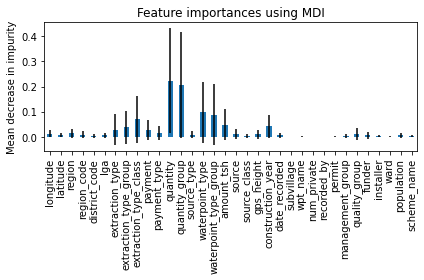

In [69]:
import time
import matplotlib.pyplot as plt

start_time = time.time()
importances = best_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=our_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [48]:
val_pred = best_clf.predict(X_test)

In [49]:
error = np.mean(y_test != val_pred.reshape(-1,1))
accuracy = 1-error
accuracy

status_group    0.720034
dtype: float64

In [55]:
test_data_id = pd.read_csv('cleanedTestData.csv')
test_data_id = test_data_id['id']

In [56]:
test_pred = pd.Series(best_clf.predict(encoded_test))
test_dict = {'id': test_data_id,'status_group':test_pred}
test_pred_complete = pd.DataFrame(test_dict)
test_pred_complete.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [57]:
test_pred_complete.to_csv('04032022.csv', index=False)